In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv').drop('id',1).drop('Unnamed: 32', 1)

In [3]:
X, y = np.array(df.values[:,1:]), np.array(df.values[:,0])

In [4]:
print(X.shape, y.shape)

(569, 30) (569,)


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
X_std = StandardScaler().fit_transform(X)

/home/victorgarritano/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
cov_mat = np.cov(X_std.T)

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [9]:
# print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[  1.33049908e+01   5.70137460e+00   2.82291016e+00   1.98412752e+00
   1.65163324e+00   1.20948224e+00   6.76408882e-01   4.77456255e-01
   4.17628782e-01   3.51310875e-01   2.94433153e-01   2.61621161e-01
   2.41782421e-01   1.57286149e-01   9.43006956e-02   8.00034045e-02
   5.95036135e-02   5.27114222e-02   4.95647002e-02   1.33279057e-04
   7.50121413e-04   1.59213600e-03   6.91261258e-03   8.19203712e-03
   1.55085271e-02   1.80867940e-02   2.43836914e-02   2.74877113e-02
   3.12142606e-02   3.00256631e-02]


In [10]:
u,s,v = np.linalg.svd(X_std.T)

In [11]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [12]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
13.3049907944
5.70137460373
2.82291015501
1.98412751773
1.65163324233
1.2094822398
0.676408881701
0.47745625469
0.417628782108
0.351310874882
0.294433153491
0.261621161366
0.241782421328
0.157286149218
0.0943006956011
0.0800034044774
0.0595036135304
0.0527114222101
0.049564700213
0.0312142605531
0.0300256630904
0.0274877113389
0.0243836913546
0.0180867939843
0.0155085271344
0.00819203711761
0.00691261257918
0.0015921360012
0.000750121412719
0.000133279056665


In [13]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

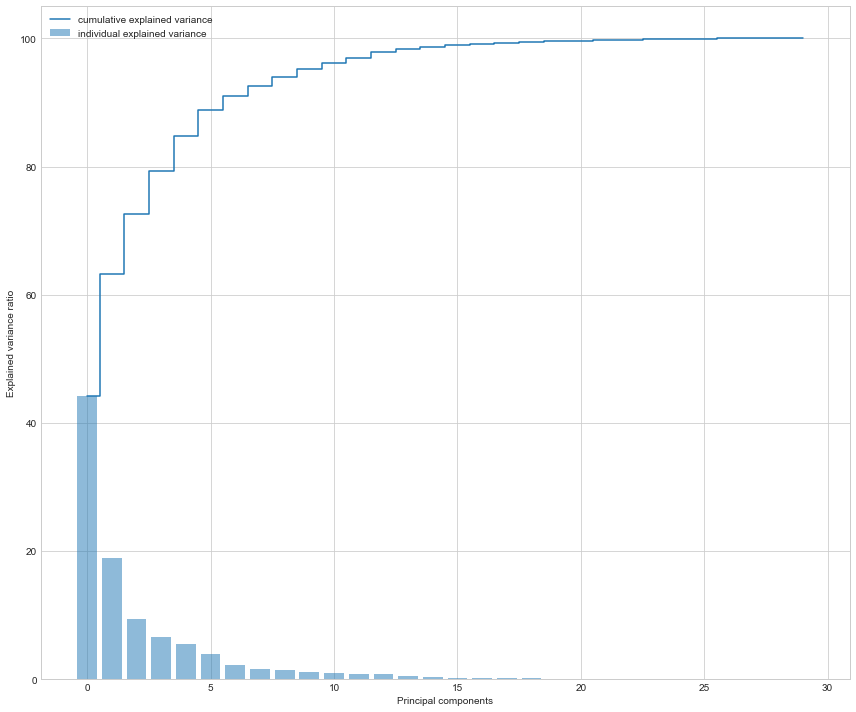

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 10))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [15]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.21890244 -0.23385713]
 [ 0.10372458 -0.05970609]
 [ 0.22753729 -0.21518136]
 [ 0.22099499 -0.23107671]
 [ 0.14258969  0.18611302]
 [ 0.23928535  0.15189161]
 [ 0.25840048  0.06016536]
 [ 0.26085376 -0.0347675 ]
 [ 0.13816696  0.19034877]
 [ 0.06436335  0.36657547]
 [ 0.20597878 -0.10555215]
 [ 0.01742803  0.08997968]
 [ 0.21132592 -0.08945723]
 [ 0.20286964 -0.15229263]
 [ 0.01453145  0.20443045]
 [ 0.17039345  0.2327159 ]
 [ 0.15358979  0.19720728]
 [ 0.1834174   0.13032156]
 [ 0.04249842  0.183848  ]
 [ 0.10256832  0.28009203]
 [ 0.22799663 -0.21986638]
 [ 0.10446933 -0.0454673 ]
 [ 0.23663968 -0.19987843]
 [ 0.22487053 -0.21935186]
 [ 0.12795256  0.17230435]
 [ 0.21009588  0.14359317]
 [ 0.22876753  0.09796411]
 [ 0.25088597 -0.00825724]
 [ 0.12290456  0.14188335]
 [ 0.13178394  0.27533947]]


In [16]:
Y = X_std.dot(matrix_w)

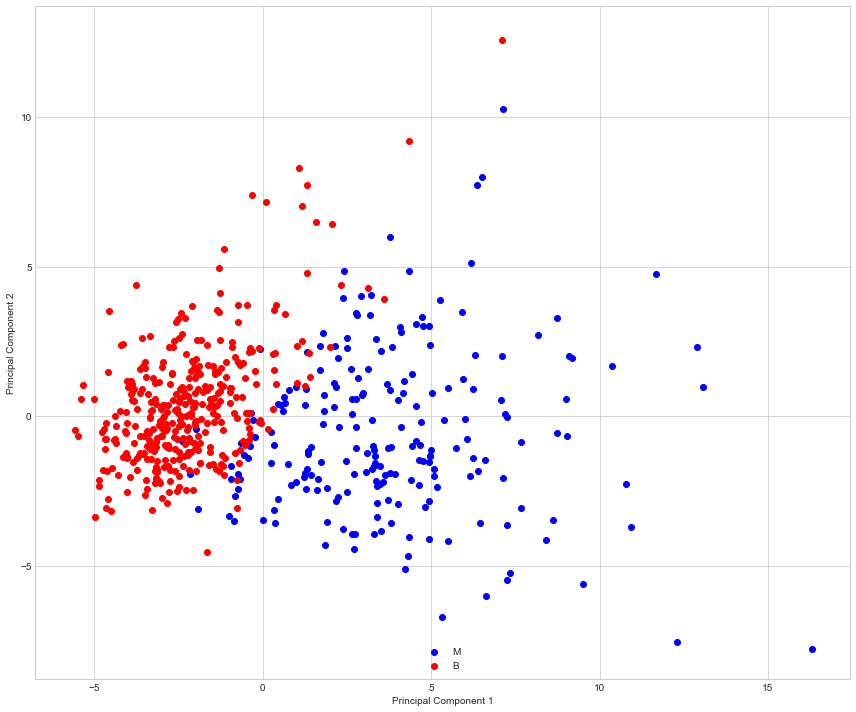

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 10))
    for lab, col in zip(('M', 'B'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [18]:
matrix_w3 = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

print('Matrix W3:\n', matrix_w3)

Matrix W3:
 [[ 0.21890244 -0.23385713 -0.00853124]
 [ 0.10372458 -0.05970609  0.0645499 ]
 [ 0.22753729 -0.21518136 -0.00931422]
 [ 0.22099499 -0.23107671  0.02869953]
 [ 0.14258969  0.18611302 -0.1042919 ]
 [ 0.23928535  0.15189161 -0.07409157]
 [ 0.25840048  0.06016536  0.00273384]
 [ 0.26085376 -0.0347675  -0.02556354]
 [ 0.13816696  0.19034877 -0.04023994]
 [ 0.06436335  0.36657547 -0.02257409]
 [ 0.20597878 -0.10555215  0.26848139]
 [ 0.01742803  0.08997968  0.37463367]
 [ 0.21132592 -0.08945723  0.26664537]
 [ 0.20286964 -0.15229263  0.21600653]
 [ 0.01453145  0.20443045  0.30883898]
 [ 0.17039345  0.2327159   0.15477972]
 [ 0.15358979  0.19720728  0.17646374]
 [ 0.1834174   0.13032156  0.22465757]
 [ 0.04249842  0.183848    0.28858429]
 [ 0.10256832  0.28009203  0.21150376]
 [ 0.22799663 -0.21986638 -0.04750699]
 [ 0.10446933 -0.0454673  -0.04229782]
 [ 0.23663968 -0.19987843 -0.04854651]
 [ 0.22487053 -0.21935186 -0.01190232]
 [ 0.12795256  0.17230435 -0.25979761]
 [ 0.21009588

In [19]:
Y3 = X_std.dot(matrix_w3)

In [20]:
Y3.shape

(569, 3)

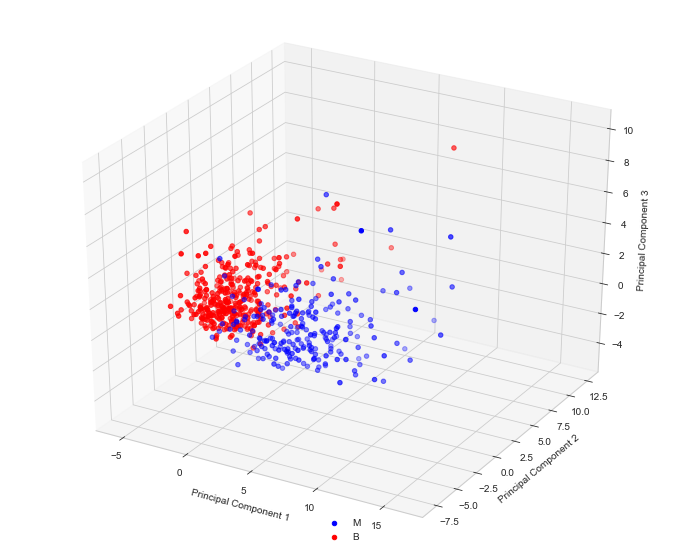

In [21]:
from mpl_toolkits.mplot3d import Axes3D
with plt.style.context('seaborn-whitegrid'):
    fig1 = plt.figure(figsize=(12, 10))
    ax = fig1.add_subplot(111, projection='3d')
    for lab, col in zip(('M', 'B'),
                        ('blue', 'red', 'green')):
        ax.scatter(Y3[y==lab, 0],
                    Y3[y==lab, 1],
                   Y3[y==lab, 2],
                    label=lab,
                    c=col)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.legend(loc='lower center')
    # ax.tight_layout()
    plt.show()

In [22]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split

/home/victorgarritano/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
y[y == 'M'] = 0
y[y == 'B'] = 1
clf = xgb.XGBClassifier(missing=np.nan, max_depth=5,
                        n_estimators=500, learning_rate=0.03, 
                        nthread=-1, subsample=0.95, colsample_bytree=0.85, seed=4242)

X_fit, X_eval, y_fit, y_eval= train_test_split(Y3, y, test_size=0.2)

In [24]:
clf.fit(X_fit, y_fit, early_stopping_rounds=50, eval_metric="auc", eval_set=[(X_eval, y_eval)])

[0]	validation_0-auc:0.994805
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.981656
[2]	validation_0-auc:0.992695
[3]	validation_0-auc:0.985065
[4]	validation_0-auc:0.977273
[5]	validation_0-auc:0.956818
[6]	validation_0-auc:0.983117
[7]	validation_0-auc:0.958766
[8]	validation_0-auc:0.978896
[9]	validation_0-auc:0.983117
[10]	validation_0-auc:0.979221
[11]	validation_0-auc:0.98539
[12]	validation_0-auc:0.992208
[13]	validation_0-auc:0.989935
[14]	validation_0-auc:0.991883
[15]	validation_0-auc:0.992857
[16]	validation_0-auc:0.991234
[17]	validation_0-auc:0.992532
[18]	validation_0-auc:0.993182
[19]	validation_0-auc:0.994156
[20]	validation_0-auc:0.99448
[21]	validation_0-auc:0.993506
[22]	validation_0-auc:0.994156
[23]	validation_0-auc:0.99448
[24]	validation_0-auc:0.994805
[25]	validation_0-auc:0.994805
[26]	validation_0-auc:0.99448
[27]	validation_0-auc:0.994805
[28]	validation_0-auc:0.995779
[29]	validation_0-auc:0.995779
[30]	validation_0-au

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.95)